In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imsave
from scipy.ndimage import center_of_mass


In [3]:
def detect_center_of_mass(bitmap):
    """
    Detects the center of mass of white pixels (non-zero) in the given bitmap.

    Parameters:
    - bitmap: 2D NumPy array representing the bitmap.

    Returns:
    - center: Tuple (cy, cx) representing the center of mass of white pixels.
    """
    mask = bitmap[bitmap>1]
    return center_of_mass(bitmap)

def interpolate_shape_from_bitmaps(bitmap_initial, bitmap_final, steps, output_folder):
    """
    Interpolates the movement of the center of mass of white pixels in two bitmaps
    and generates bitmap frames, saving them as .bmp files.

    Parameters:
    - bitmap_initial: 2D NumPy array, the initial bitmap containing a shape.
    - bitmap_final: 2D NumPy array, the final bitmap containing a shape.
    - steps: Number of interpolation steps (frames).
    - output_folder: Folder where the generated bitmaps will be saved.
    """
    # Detect the center of mass in the initial and final bitmaps
    center_initial = detect_center_of_mass(bitmap_initial)
    center_final = detect_center_of_mass(bitmap_final)
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Generate the interpolated midpoints between initial and final center of mass
    cy_interp = np.linspace(center_initial[0], center_final[0], steps)
    cx_interp = np.linspace(center_initial[1], center_final[1], steps)
    
    # Generate and save each interpolated bitmap
    for i in range(steps):
        # Calculate the translation vector
        translation = (int(cy_interp[i] - center_initial[0]), int(cx_interp[i] - center_initial[1]))
        
        # Create a shifted bitmap by translating the initial shape
        bitmap_shifted = np.roll(np.roll(bitmap_initial, translation[0], axis=0), translation[1], axis=1)
        
        # Save the shifted bitmap
        filename = os.path.join(output_folder, f"frame_{i+1:03d}.bmp")
        imsave(filename, bitmap_shifted, cmap='gray')  # Save as bmp

def view_bitmaps(output_folder):
    """
    Reads all .bmp files from a folder and displays them in a grid using subplots.

    Parameters:
    - output_folder: Folder containing the .bmp files to display.
    """
    # Get list of all .bmp files in the folder
    bmp_files = sorted([f for f in os.listdir(output_folder) if f.endswith('.bmp')])
    
    # Define number of columns and rows for the plot
    num_files = len(bmp_files)
    cols = 5
    rows = (num_files + cols - 1) // cols  # Calculate number of rows
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.ravel()  # Flatten the axes array for easy indexing
    
    for i, bmp_file in enumerate(bmp_files):
        img = plt.imread(os.path.join(output_folder, bmp_file))
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')  # Hide axis for cleaner look
        axes[i].set_title(f"Frame {i+1}")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Final')

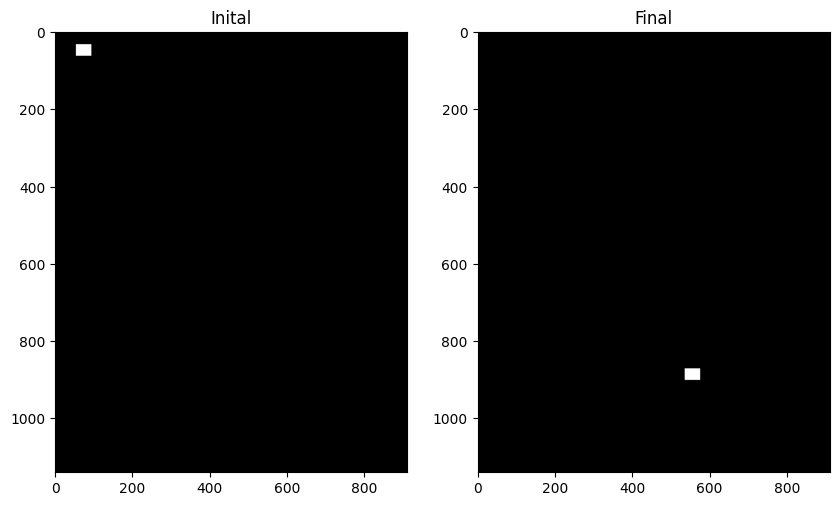

In [8]:
path2bitmap_inital = 'rect_frames_v2/frame_001.bmp'
path2bitmap_final = 'rect_frames_v2/frame_013.bmp'

bitmap_inital = plt.imread(path2bitmap_inital)
bitmap_final = plt.imread(path2bitmap_final)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(bitmap_inital, cmap='grey')
ax1.set_title('Inital')
ax2.imshow(bitmap_final, cmap='grey')
ax2.set_title('Final')

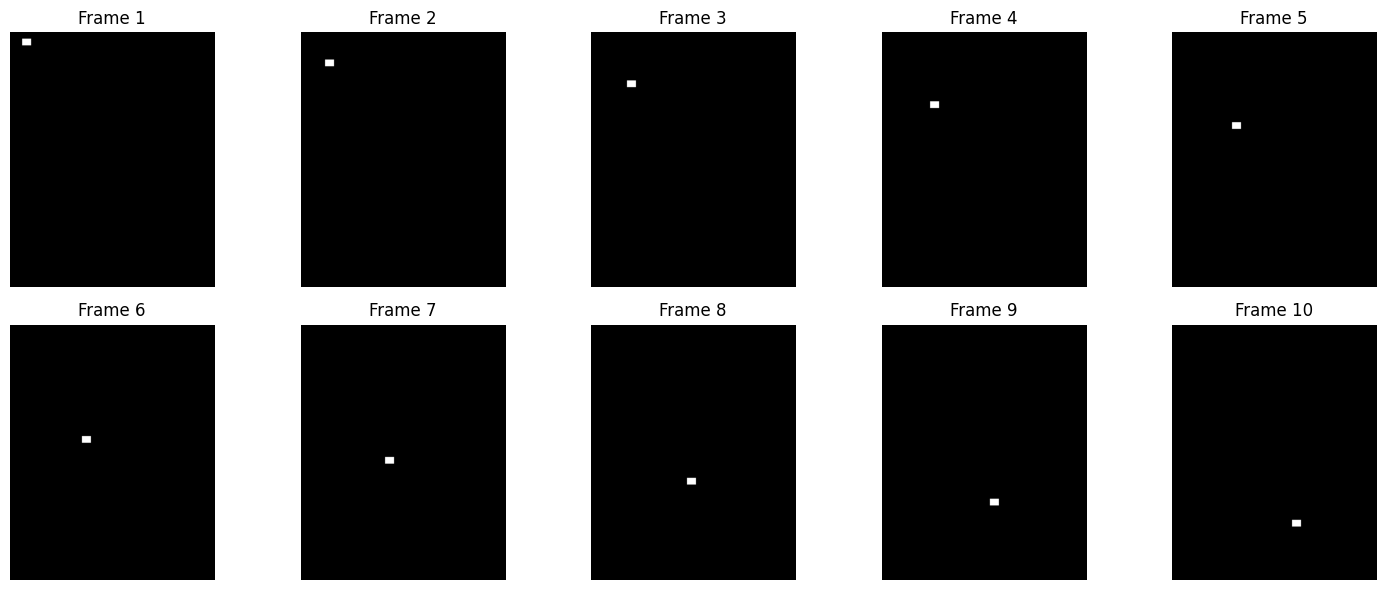

In [9]:
# # Example usage
steps = 10
output_folder = "shape_frames"  # Folder to save the .bmp files

# Generate interpolated bitmaps between the two bitmaps
interpolate_shape_from_bitmaps(bitmap_inital, bitmap_final, steps, output_folder)

# View the generated .bmp files
view_bitmaps(output_folder)


In [ ]:

def detect_center_of_mass(bitmap):
    """
    Detects the center of mass of white pixels (non-zero) in the given bitmap.

    Parameters:
    - bitmap: 2D NumPy array representing the bitmap.

    Returns:
    - center: Tuple (cy, cx) representing the center of mass of white pixels.
    """
    mask = bitmap[bitmap>1]
    return center_of_mass(bitmap)

def interpolate_shape_from_bitmaps(bitmap_initial, bitmap_final, steps, output_folder):
    """
    Interpolates the movement of the center of mass of white pixels in two bitmaps
    and generates bitmap frames, saving them as .bmp files.

    Parameters:
    - bitmap_initial: 2D NumPy array, the initial bitmap containing a shape.
    - bitmap_final: 2D NumPy array, the final bitmap containing a shape.
    - steps: Number of interpolation steps (frames).
    - output_folder: Folder where the generated bitmaps will be saved.
    """
    # Detect the center of mass in the initial and final bitmaps
    center_initial = detect_center_of_mass(bitmap_initial)
    center_final = detect_center_of_mass(bitmap_final)
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Generate the interpolated midpoints between initial and final center of mass
    cy_interp = np.linspace(center_initial[0], center_final[0], steps)
    cx_interp = np.linspace(center_initial[1], center_final[1], steps)
    
    # Generate and save each interpolated bitmap
    for i in range(steps):
        # Calculate the translation vector
        translation = (int(cy_interp[i] - center_initial[0]), int(cx_interp[i] - center_initial[1]))
        
        # Create a shifted bitmap by translating the initial shape
        bitmap_shifted = np.roll(np.roll(bitmap_initial, translation[0], axis=0), translation[1], axis=1)
        
        # Save the shifted bitmap
        filename = os.path.join(output_folder, f"frame_{i+1:03d}.bmp")
        imsave(filename, bitmap_shifted, cmap='gray')  # Save as bmp

def view_bitmaps(output_folder):
    """
    Reads all .bmp files from a folder and displays them in a grid using subplots.

    Parameters:
    - output_folder: Folder containing the .bmp files to display.
    """
    # Get list of all .bmp files in the folder
    bmp_files = sorted([f for f in os.listdir(output_folder) if f.endswith('.bmp')])
    
    # Define number of columns and rows for the plot
    num_files = len(bmp_files)
    cols = 5
    rows = (num_files + cols - 1) // cols  # Calculate number of rows
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.ravel()  # Flatten the axes array for easy indexing
    
    for i, bmp_file in enumerate(bmp_files):
        img = plt.imread(os.path.join(output_folder, bmp_file))
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')  # Hide axis for cleaner look
        axes[i].set_title(f"Frame {i+1}")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Let's assume `bitmap_initial` and `bitmap_final` are 2D numpy arrays with white pixel shapes.
# For demonstration purposes, you can use synthetic bitmaps.

# Create synthetic initial and final bitmaps with arbitrary shapes
bitmap_initial = np.zeros((100, 150), dtype=np.uint8)
bitmap_initial[40:60, 70:90] = 1  # A square in the initial frame

bitmap_final = np.zeros((100, 150), dtype=np.uint8)
bitmap_final[60:80, 110:130] = 1  # A square in the final frame

# Number of interpolation steps (frames)
steps = 10
output_folder = "shape_frames"  # Folder to save the .bmp files

# Generate interpolated bitmaps between the two bitmaps
interpolate_shape_from_bitmaps(bitmap_initial, bitmap_final, steps, output_folder)

# View the generated .bmp files
view_bitmaps(output_folder)


In [ ]:

def detect_center_of_mass(bitmap):
    """
    Detects the center of mass of white pixels (non-zero) in the given bitmap.

    Parameters:
    - bitmap: 2D NumPy array representing the bitmap.

    Returns:
    - center: Tuple (cy, cx) representing the center of mass of white pixels.
    """
    mask = bitmap[bitmap>1]
    return center_of_mass(bitmap)

def interpolate_shape_from_bitmaps(bitmap_initial, bitmap_final, steps, output_folder):
    """
    Interpolates the movement of the center of mass of white pixels in two bitmaps
    and generates bitmap frames, saving them as .bmp files.

    Parameters:
    - bitmap_initial: 2D NumPy array, the initial bitmap containing a shape.
    - bitmap_final: 2D NumPy array, the final bitmap containing a shape.
    - steps: Number of interpolation steps (frames).
    - output_folder: Folder where the generated bitmaps will be saved.
    """
    # Detect the center of mass in the initial and final bitmaps
    center_initial = detect_center_of_mass(bitmap_initial)
    center_final = detect_center_of_mass(bitmap_final)
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Generate the interpolated midpoints between initial and final center of mass
    cy_interp = np.linspace(center_initial[0], center_final[0], steps)
    cx_interp = np.linspace(center_initial[1], center_final[1], steps)
    
    # Generate and save each interpolated bitmap
    for i in range(steps):
        # Calculate the translation vector
        translation = (int(cy_interp[i] - center_initial[0]), int(cx_interp[i] - center_initial[1]))
        
        # Create a shifted bitmap by translating the initial shape
        bitmap_shifted = np.roll(np.roll(bitmap_initial, translation[0], axis=0), translation[1], axis=1)
        
        # Save the shifted bitmap
        filename = os.path.join(output_folder, f"frame_{i+1:03d}.bmp")
        imsave(filename, bitmap_shifted, cmap='gray')  # Save as bmp

def view_bitmaps(output_folder):
    """
    Reads all .bmp files from a folder and displays them in a grid using subplots.

    Parameters:
    - output_folder: Folder containing the .bmp files to display.
    """
    # Get list of all .bmp files in the folder
    bmp_files = sorted([f for f in os.listdir(output_folder) if f.endswith('.bmp')])
    
    # Define number of columns and rows for the plot
    num_files = len(bmp_files)
    cols = 5
    rows = (num_files + cols - 1) // cols  # Calculate number of rows
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.ravel()  # Flatten the axes array for easy indexing
    
    for i, bmp_file in enumerate(bmp_files):
        img = plt.imread(os.path.join(output_folder, bmp_file))
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')  # Hide axis for cleaner look
        axes[i].set_title(f"Frame {i+1}")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Let's assume `bitmap_initial` and `bitmap_final` are 2D numpy arrays with white pixel shapes.
# For demonstration purposes, you can use synthetic bitmaps.

# Create synthetic initial and final bitmaps with arbitrary shapes
bitmap_initial = np.zeros((100, 150), dtype=np.uint8)
bitmap_initial[40:60, 70:90] = 1  # A square in the initial frame

bitmap_final = np.zeros((100, 150), dtype=np.uint8)
bitmap_final[60:80, 110:130] = 1  # A square in the final frame

# Number of interpolation steps (frames)
steps = 10
output_folder = "shape_frames"  # Folder to save the .bmp files

# Generate interpolated bitmaps between the two bitmaps
interpolate_shape_from_bitmaps(bitmap_initial, bitmap_final, steps, output_folder)

# View the generated .bmp files
view_bitmaps(output_folder)
